<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Mise-en-bouche" data-toc-modified-id="Mise-en-bouche-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Mise en bouche</a></span></li></ul></div>

# Mise en bouche
Pour ce tp, on va effectuer *une descente de gradient sur un polynôme à deux variables*, d'ordre 2 sur les deux variables. Pour les besoins de ce tp on va connaître à l'avance les racines (réélles) de ce polynôme que l'on va générer aléatoirement.

On contraint notre fonction polynomiale à être la somme de deux polynômes indépendants sur chaque variable (pas de termes conjugués), et on se fixe 4 racines $r_1, r_2$ et $r'_1, r'_2$ 
Et on fixe le polynôme :
$$f(x,x') = (x - r_1)(x - r_2) + (x' - r'_1)(x' - r'_2)$$

Pour les besoins du tp, on fixera aléatoirement les racines entre 1 et 10.

## Exercice 1, "fabrication" de la fonction $f(x_1,x_2)$

- *Générer* aléatoirement les racines entières $r_i$ et $r'_i$ avec la fonction [`randint`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.randint.html) de `numpy.random`, compris entre 1 et 10 inclus. *Les afficher*.
- Coder la fonction $f(x_1,x_2)$ qui prend en argument deux nombres et renvoie le polynôme décrit ci-dessous. Il est fortement recommandé de s'aider de :
    - [`polyfromroots`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.polynomial.polynomial.polyfromroots.html?highlight=polyfromroots#numpy.polynomial.polynomial.polyfromroots)
    - la fonction `polyfromcoef` ci-jointe, qui prend en argument un array numpy de coefficients polynomiaux et un nombre et  qui renvoie la valeur du polyome en ce nombre.

In [14]:
def polyfromcoef(pol,x):
    xa = x
    acc = pol[0]    
    for i in range(1,pol.shape[0]):
        acc = acc + pol[i] * xa
        xa = x * xa
    return acc + 0.2 * x * xa

In [15]:
import numpy as np

# générer les racines 
r = np.random.randint(1,11,(2,2))
print(r)

[[ 6 10]
 [ 4  7]]


On sait d'avance que le gradient a une valeur en zéro pour 
$$x_1 =  \frac{r_1+r_2}{2}$$
$$x_2 =  \frac{r'_1+r'_2}{2}$$

In [16]:
poly1 = np.polynomial.polynomial.polyfromroots(r[0])
poly2 = np.polynomial.polynomial.polyfromroots(r[1])

In [17]:
def f(x):
    return polyfromcoef(poly1,x[:,0]) + polyfromcoef(poly2,x[:,1])

In [18]:
f(np.array([[2.,3.],[1.,-2.]]))

array([ 55.4, 102.4])

## Exercice 2, un peu de visualisation

- Trouver des intervalles intéressant de visualisation

In [ ]:
%matplotlib --list

In [19]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

def plot_surface_tp(f,X1,X2):
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ## Bien choisir les intervalles en fonction des racines
    X1, X2 = np.meshgrid(X1, X2)
    XT = np.transpose(np.stack((X1.flatten(),X2.flatten())))
    Y = np.reshape(f(XT),X1.shape)

    # Afficher la surface
    surf = ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    # divers d'affichage
    ax.set_zlim(np.min(Y), np.max(Y))
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # colorbar
    return fig.colorbar(surf, shrink=0.5, aspect=5)

In [20]:
def interesting_range(r,fact):
    aoe = np.max(r)-np.min(r)
    minarg = np.sum(r)/2
    return np.arange(minarg - fact*aoe,minarg+fact*aoe, aoe/20)

<IPython.core.display.Javascript object>


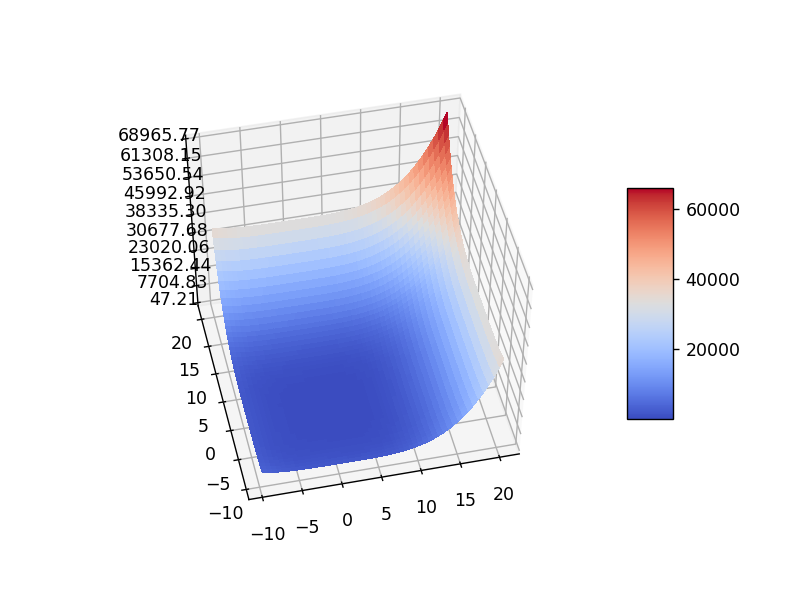

In [21]:
axe1 = interesting_range(r[0],5)
axe2 = interesting_range(r[1],5)

plot_surface_tp(f,axe2,axe2);

## Exercice 3 calcul du gradient

Calculer la valeur du gradient du polynôme en $(1,1)$

In [13]:
import torch 

x0 = torch.tensor([[1.,1.]],requires_grad=True)
f(x0).backward()
#fval.backward()
print(f(x0))
print(x0)
x0.grad.data

tensor([99.], grad_fn=<AddBackward0>)
tensor([[1., 1.]], requires_grad=True)


tensor([[-16., -13.]])

## Exercice 4 visualisation du gradient

Visualiser la surface correspondant à la norme du gradient.
 - Coder la fonction qui renvoie la norme du gradient en un point, i.e. $||\nabla{f}_{x_1,x_2}(x_1,x_2)||$

In [22]:
def fgrad(x):
    xtorch = torch.tensor(x,requires_grad=True)
    fval = torch.sum(f(xtorch))
    fval.backward()
    
    return torch.norm(xtorch.grad.data,dim=1).numpy()

In [23]:
def plot_contour_tp(f,X1,X2,Y=None):
    fig = plt.figure()
    ax = fig.gca()

    ## Bien choisir les intervalles en fonction des racines
    X1, X2 = np.meshgrid(X1, X2)

    if (Y is None):
        XT = np.transpose(np.stack((X1.flatten(),X2.flatten())))
        Y = np.reshape(f(XT),X1.shape)

    # Afficher la surface
    cont = ax.contourf(X1, X2, Y, cmap=cm.coolwarm, antialiased=False,levels=100)

    # colorbar
    fig.colorbar(cont, shrink=0.5, aspect=5)
    return Y

<IPython.core.display.Javascript object>


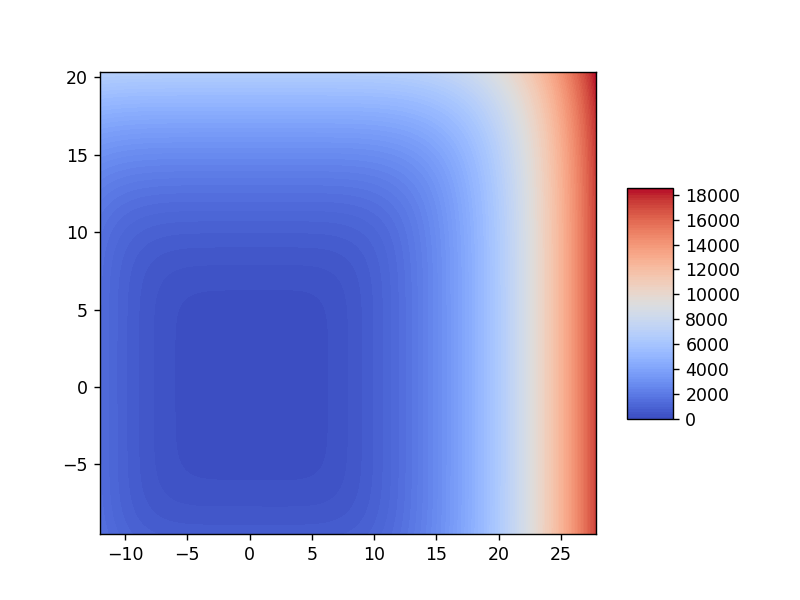

In [24]:
Yp = plot_contour_tp(fgrad,axe1,axe2)

## Descente proprement dite

### Exercice 4

Coder la descente de gradient, jouer avec plusieurs valeurs de $\eta$. Que constatez vous?

In [25]:
def gd(f, x, eta, epsilon,max_iter=50):
    xs = []
    count = 0
    while (count < max_iter):
        count = count + 1
        f(x).backward()
        if (np.linalg.norm(x.grad.numpy()) < epsilon):
            break
        else:
            xs.append([x.data[0,0].item(),x.data[0,1].item()])
            x.data.sub_(eta * x.grad.data)
            x.grad.data.zero_()
    print("Itérations : ",count)
    return np.array(xs)

<IPython.core.display.Javascript object>


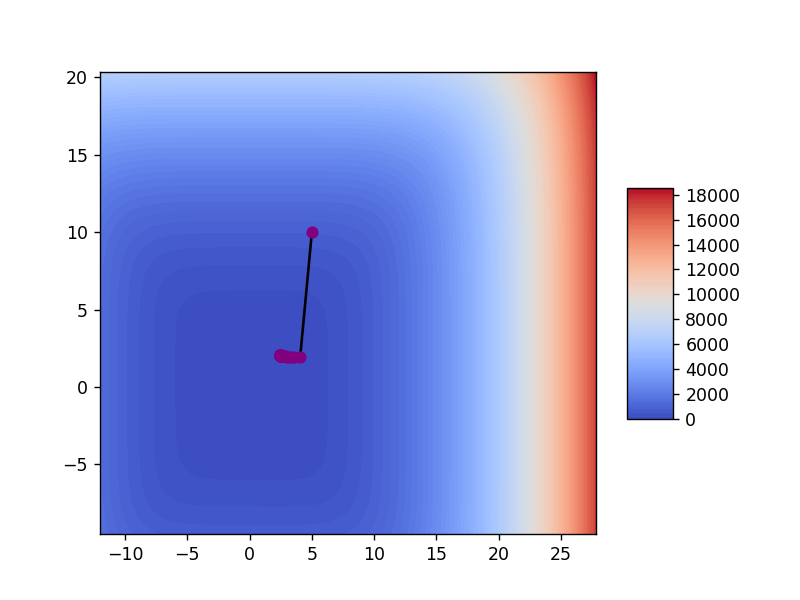

Itérations :  50
[[ 5.         10.        ]
 [ 4.05999994  1.90999985]
 [ 3.60341263  1.92605686]
 [ 3.31703377  1.94037509]
 [ 3.1187222   1.95312262]
 [ 2.97367549  1.96445572]
 [ 2.86383843  1.97451854]
 [ 2.77865791  1.98344338]
 [ 2.71145391  1.99135077]
 [ 2.65774846  1.9983505 ]
 [ 2.61440682  2.00454164]
 [ 2.57916045  2.01001382]
 [ 2.55032325  2.01484728]
 [ 2.52661538  2.01911449]
 [ 2.50704813  2.0228796 ]
 [ 2.49084687  2.02620029]
 [ 2.47739792  2.02912807]
 [ 2.46620965  2.03170824]
 [ 2.45688581  2.03398156]
 [ 2.44910431  2.03598404]
 [ 2.44260216  2.03774738]
 [ 2.43716359  2.03929996]
 [ 2.43261075  2.04066658]
 [ 2.42879701  2.0418694 ]
 [ 2.42560029  2.04292774]
 [ 2.42291951  2.043859  ]
 [ 2.42067027  2.04467845]
 [ 2.41878271  2.04539919]
 [ 2.41719818  2.04603314]
 [ 2.41586757  2.04659081]
 [ 2.4147501   2.04708123]
 [ 2.41381145  2.04751253]
 [ 2.41302299  2.04789186]
 [ 2.41236043  2.0482254 ]
 [ 2.41180372  2.04851866]
 [ 2.41133595  2.04877663]
 [ 2.410942

In [31]:
x0 = torch.tensor([[5.,10.]],requires_grad=True)
plot_contour_tp(fgrad,axe1,axe2,Yp)
toplot = gd(f,x0, 0.01,0.001)
print(toplot)
plt.plot(toplot[:,0],toplot[:,1],'k')
plt.plot(toplot[:,0],toplot[:,1], 'o', color='purple');

### Exercice 5

On se propose maintenant de perturber "légèrement" les polynômes initiaux en leur ajoutant un facteur $\frac{x^3}{5}$.
Refaire les exercices précédents. Que constatez vous sur la stabilité de la descente de gradient?